# Model 3D: Alzheimer desease detection using volume patches

Processing data by applying masks and storing result images into a new directory

In [1]:
import os
import numpy as np
from utils import *
from pathlib import Path

In [2]:
if not os.path.isdir("ADNI_PROCESSED"):
    process_irm_data()

Cut 3D patches using x, y, z

In [5]:
def custom_patch_3D(img_n_mmni, x_tup, y_tup, z_tup):
    axe_dim = {"x": img_n_mmni.shape[0], "y": img_n_mmni.shape[1], "z":img_n_mmni.shape[2]}
    if axe_dim["x"] <= x_tup[1] or x_tup[0] < 0 or axe_dim["y"] <= y_tup[1] or y_tup[0] < 0 or axe_dim["z"] <= z_tup[1] or z_tup[0] < 0 :
        print("Invalid values")
        return 
    else:
        cropped_img = img_n_mmni.slicer[x_tup[0]:x_tup[1], y_tup[0]:y_tup[1], z_tup[0]:z_tup[1]]
        img_data = cropped_img.get_fdata()
        img_data.resize(img_data.shape + (1, ))
        return img_data

In [3]:
path = str(Path().resolve()) + "/ADNI1/list_standardized_tongtong_2017.csv"
y_data = load_data(path)
y_data.head(7)

,Rooster ID,Group
Subject ID,,
002_S_0295,295,CN
002_S_0413,413,CN
002_S_0559,559,CN
002_S_0619,619,AD
002_S_0685,685,CN
002_S_0816,816,AD
002_S_0938,938,AD


Prepare training on one hyppocampus
- Cut 3D patches and store them into a trainin set.
- Constructing y_train with 0 and 1 by checking labels of images

In [59]:
from tensorflow.keras.utils import to_categorical
# x y z hypocamp = 
#x = 40, 80   autre  140
#y = 90, 130  autre 132
#z = 40, 80   autre 77
usecols = ['Subject ID', 'Rooster ID', 'Group']
# ['CN', 'AD']
def prepare_X_of_Y_3D(Y):
    X_data = []
    Y_data = []
    X_test_index = []
    path = str(Path().resolve()) + "/ADNI_PROCESSED"
    n_test_AD = 0
    n_test_CN = 0
    for index, row in Y.iterrows():
        file = path + '/n_mmni_fADNI_' + index + '_1.5T_t1w.nii.gz'
        if os.path.isfile(file):
            img_n_mmni = nib.load(file)
            # Taking 4 images for test purpose
            if (Y['Group'][index] == 'AD' and n_test_AD < 2) or (Y['Group'][index] == 'CN' and n_test_CN < 2):
                n_test_AD += 1 if Y['Group'][index] == 'AD' else n_test_AD
                n_test_CN += 1 if Y['Group'][index] == 'CN' else n_test_CN
                X_test_index.append(index)
            else:
                img_data = custom_patch_3D(img_n_mmni, x_tup=(100,140), y_tup=(90, 130), z_tup=(40, 80))
                X_data.append(img_data)
                if Y['Group'][index] == 'AD':
                    Y_data.append(1)
                elif Y['Group'][index] == 'CN':
                    Y_data.append(0)
        else:
            Y.drop(index, inplace=True)
    return np.array(X_data), Y_data, X_test_index

X_data_3D, Y_data_list_3D, X_test_index_3D = prepare_X_of_Y_3D(y_data)
Y_data_3D = to_categorical(Y_data_list_3D, num_classes=2)
    
print(len(X_data_3D) == len(Y_data_3D))
print(len(X_data_3D))

True
415


In [51]:
import pandas as pd
X_data_3D.shape

(415, 40, 40, 40, 1)

This function is to run if you want to prepare a trainig set composed with left and write hyppocampus

In [ ]:
from tensorflow.keras.utils import to_categorical
# x y z hypocamp =
#x = 40, 80   autre  140
#y = 90, 130  autre 132
#z = 40, 80   autre 77
usecols = ['Subject ID', 'Rooster ID', 'Group']
# ['CN', 'AD']
def prepare_X_of_Y_3D_left(Y):
    X_data = []
    Y_data = []
    X_test_index = []
    path = str(Path().resolve()) + "/ADNI_PROCESSED"
    n_test_AD = 0
    n_test_CN = 0
    for index, row in Y.iterrows():
        file = path + '/n_mmni_fADNI_' + index + '_1.5T_t1w.nii.gz'
        if os.path.isfile(file):
            img_n_mmni = nib.load(file)
            # Taking 4 images for test purpose
            if (Y['Group'][index] == 'AD' and n_test_AD < 2) or (Y['Group'][index] == 'CN' and n_test_CN < 2):
                n_test_AD += 1 if Y['Group'][index] == 'AD' else n_test_AD
                n_test_CN += 1 if Y['Group'][index] == 'CN' else n_test_CN
                X_test_index.append(index)
            else:
                img_data = custom_patch_3D(img_n_mmni, x_tup=(90,130), y_tup=(90, 130), z_tup=(40, 80))
                X_data.append(img_data)
                if Y['Group'][index] == 'AD':
                    Y_data.append(1)
                elif Y['Group'][index] == 'CN':
                    Y_data.append(0)
        else:
            Y.drop(index, inplace=True)
    return np.array(X_data), Y_data, X_test_index

def prepare_X_of_Y_3D_right(Y):
    X_data = []
    Y_data = []
    X_test_index = []
    Y_test = []
    path = str(Path().resolve()) + "/ADNI_PROCESSED"
    n_test_AD = 0
    n_test_CN = 0
    #f = open(path, "r")
    for index, row in Y.iterrows():
        file = path + '/n_mmni_fADNI_' + index + '_1.5T_t1w.nii.gz'
        if os.path.isfile(file):
            img_n_mmni = nib.load(file)
            # Taking 4 images for test purpose
            if (Y['Group'][index] == 'AD' and n_test_AD < 2) or (Y['Group'][index] == 'CN' and n_test_CN < 2):
                n_test_AD += 1 if Y['Group'][index] == 'AD' else n_test_AD
                n_test_CN += 1 if Y['Group'][index] == 'CN' else n_test_CN
                X_test_index.append(index)
            else:
                img_data = custom_patch_3D(img_n_mmni, x_tup=(100,140), y_tup=(90, 130), z_tup=(40, 80))
                img_data = np.transpose(img_data, (0, 1, 2, 3))
                X_data.append(img_data)
                if Y['Group'][index] == 'AD':
                    Y_data.append(1)
                elif Y['Group'][index] == 'CN':
                    Y_data.append(0)
        else:
            Y.drop(index, inplace=True)
    return np.array(X_data), Y_data, X_test_index

X_data_3D_right, Y_data_list_3D_right, X_test_index_3D_right = prepare_X_of_Y_3D_right(y_data)
X_data_3D_left, Y_data_list_3D_left, X_test_index_3D_left = prepare_X_of_Y_3D_right(y_data)

X_data_3D = np.concatenate((X_data_3D_right, X_data_3D_left))
X_test_index_3D =Y_data_list_3D = np.concatenate((X_test_index_3D_right, X_test_index_3D_left))

Y_data_3D_left = to_categorical(Y_data_list_3D_left, num_classes=2)
Y_data_3D_right = to_categorical(Y_data_list_3D_right, num_classes=2)

Y_data_3D = np.concatenate((Y_data_3D_right, Y_data_3D_left))

print(len(X_data_3D) == len(Y_data_3D))
print(len(X_data_3D))

In [ ]:
X_data_3D[0].shape

Diffrent slices of the selected 3D patch

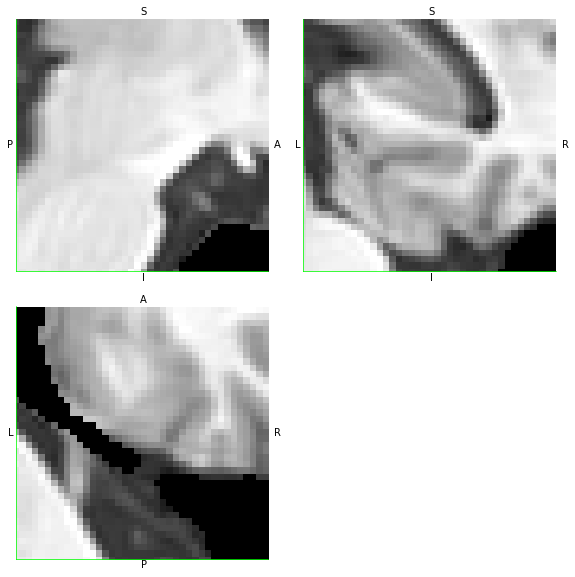

In [83]:
from nibabel.viewers import OrthoSlicer3D
OrthoSlicer3D(X_data_3D[400]).show()

### 3D implementation of classification model (one hyppocaampus)
- Creation of an auto-encoder model and an only encoder model.
- compilation of the model using adam optimizer, and binary_crossentropy loss.- fiting the model using GPU if it exists.

In [79]:
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, UpSampling2D, Cropping2D, Conv3D, MaxPooling3D, UpSampling3D, Cropping3D, Input, concatenate, Flatten, Dense, Dropout, BatchNormalization, Activation, BatchNormalization, GlobalAveragePooling2D, GlobalAveragePooling3D, add
from tensorflow.keras.models import Model

def create_Unet_model3D_encoder(input_size, depth=5, padding='valid', nb_class=2):
    inputs = Input(shape=input_size)
    x = inputs
    num_filters = 64
    for i in range(depth):
        x = Conv3D(filters=num_filters, kernel_size=(3,3,3), padding=padding)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv3D(filters=num_filters, kernel_size=(3,3,3), padding=padding)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        if i != depth - 1:
            x = MaxPooling3D(pool_size=(2,2,2), strides=2)(x)
            num_filters *= 2
    
        x = Dropout(0.7)(x)
    
    x = Flatten()(x)
    # x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    
    x = Dense(128, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    
    outputs = Dense(nb_class, activation='softmax')(x)

    return Model(inputs, outputs)

### 3D implementation of classification model (Two hyppocampus)
- 2 parallel models in one model
- compilation of the model using adam optimizer, and binary_crossentropy loss.- fiting the model using GPU if it exists.

In [46]:
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, UpSampling2D, Cropping2D, Conv3D, MaxPooling3D, UpSampling3D, Cropping3D, Input, Concatenate, Flatten, Dense, Dropout, BatchNormalization, Activation, BatchNormalization, GlobalAveragePooling2D, GlobalAveragePooling3D, add

def intermediate_network(inputs, i, depth, padding='same'):
    x = inputs[:,i,:,:,:,:]
    
    num_filters = 32
    for i in range(depth):
        x = Conv3D(filters=num_filters, kernel_size=(3,3,3), padding=padding)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv3D(filters=num_filters, kernel_size=(3,3,3), padding=padding)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        if i != depth - 1:
            x = MaxPooling3D(pool_size=(2,2,2), strides=2)(x)
            num_filters *= 2
    
    x = Dropout(0.2)(x)
    x = Flatten()(x)
    return x

def create_model_3D(input_size, depth=2, nb_class=2):
    inputs = Input(shape=input_size)
    nb_slices = 2
    out_list = []
    for i in range(nb_slices):
        out_list.append(intermediate_network(inputs=inputs, i=i, depth=depth, padding='same'))

    x = Concatenate()(out_list)
    x = Flatten()(x)
    # x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    
    x = Dense(128, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    outputs = Dense(nb_class, activation='softmax')(x)
    
    return Model(inputs, outputs)

Run this to compile model of two hyppocamus

In [ ]:
import tensorflow

OPT    = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)#0.0001

model_3 = create_model_3D(X_data_3D[0].shape, depth=2, nb_class=2)
model_3.compile(optimizer=OPT, loss='binary_crossentropy', metrics=['accuracy'])
model_3.summary()



Run this to compile model of one hyppocampus

In [80]:
import tensorflow

OPT    = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)#0.0001

model_3 = create_Unet_model3D_encoder(X_data_3D[0].shape, depth=2)
model_3.compile(optimizer=OPT, loss='binary_crossentropy', metrics=['accuracy'])
model_3.summary()


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 40, 40, 40, 1)]   0         
_________________________________________________________________
conv3d_32 (Conv3D)           (None, 38, 38, 38, 64)    1792      
_________________________________________________________________
batch_normalization_56 (Batc (None, 38, 38, 38, 64)    256       
_________________________________________________________________
activation_32 (Activation)   (None, 38, 38, 38, 64)    0         
_________________________________________________________________
conv3d_33 (Conv3D)           (None, 36, 36, 36, 64)    110656    
_________________________________________________________________
batch_normalization_57 (Batc (None, 36, 36, 36, 64)    256       
_________________________________________________________________
activation_33 (Activation)   (None, 36, 36, 36, 64)    0   

Splitting the data

In [66]:
from sklearn.model_selection import train_test_split

X_train_3D, X_val_3D, Y_train_3D, Y_val_3D = train_test_split(X_data_3D, Y_data_3D, test_size=0.2,random_state=32)
print("Data splited")

Data splited


In [81]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=10)
history = model_3.fit(np.asarray(X_train_3D), np.asarray(Y_train_3D), epochs= 12, batch_size=16, validation_data=(X_val_3D, Y_val_3D), callbacks=[es])

Epoch 1/12
21/21 [==============================] - 9s 244ms/step - loss: 12.2414 - accuracy: 0.5572 - val_loss: 20.7306 - val_accuracy: 0.4699
Epoch 2/12
21/21 [==============================] - 5s 230ms/step - loss: 11.3094 - accuracy: 0.6687 - val_loss: 17.8091 - val_accuracy: 0.4699
Epoch 3/12
21/21 [==============================] - 5s 231ms/step - loss: 10.8319 - accuracy: 0.6837 - val_loss: 13.2783 - val_accuracy: 0.4699
Epoch 4/12
21/21 [==============================] - 5s 230ms/step - loss: 10.4116 - accuracy: 0.7530 - val_loss: 10.7840 - val_accuracy: 0.4699
Epoch 5/12
21/21 [==============================] - 5s 230ms/step - loss: 10.1509 - accuracy: 0.7470 - val_loss: 9.9862 - val_accuracy: 0.6386
Epoch 6/12
21/21 [==============================] - 5s 231ms/step - loss: 9.8809 - accuracy: 0.7470 - val_loss: 9.7408 - val_accuracy: 0.6867
Epoch 7/12
21/21 [==============================] - 5s 230ms/step - loss: 9.6240 - accuracy: 0.7922 - val_loss: 9.6440 - val_accuracy: 0.67

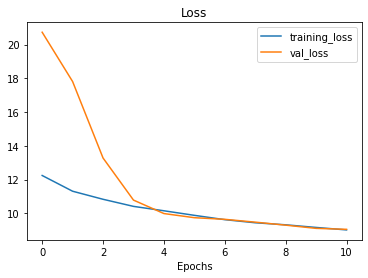

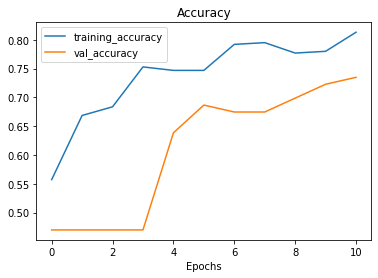

In [82]:
plot_loss_curves(history)